In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import bullet, dataset, error, speed, split
np.seterr('raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
data = dataset.load_trajectory(898, 1376323154598)
head, tail = split.split_trajectory_with_overlap(data, 0.5)

print(head[-10:], '\n\n', tail[:10])

[[6.26022950e+01 2.97492340e+01 1.37632334e+12 0.00000000e+00]
 [6.26022710e+01 2.97493520e+01 1.37632335e+12 0.00000000e+00]
 [6.26022460e+01 2.97494740e+01 1.37632335e+12 0.00000000e+00]
 [6.26022090e+01 2.97496640e+01 1.37632335e+12 0.00000000e+00]
 [6.26021840e+01 2.97497910e+01 1.37632335e+12 0.00000000e+00]
 [6.26021680e+01 2.97499310e+01 1.37632336e+12 0.00000000e+00]
 [6.26021520e+01 2.97500700e+01 1.37632336e+12 0.00000000e+00]
 [6.26021300e+01 2.97502050e+01 1.37632336e+12 0.00000000e+00]
 [6.26021060e+01 2.97503390e+01 1.37632336e+12 0.00000000e+00]
 [6.26020820e+01 2.97505370e+01 1.37632337e+12 0.00000000e+00]] 

 [[6.26020820e+01 2.97505370e+01 1.37632337e+12 0.00000000e+00]
 [6.26020560e+01 2.97506580e+01 1.37632337e+12 0.00000000e+00]
 [6.26020270e+01 2.97507770e+01 1.37632337e+12 0.00000000e+00]
 [6.26019950e+01 2.97508840e+01 1.37632337e+12 0.00000000e+00]
 [6.26019560e+01 2.97510560e+01 1.37632337e+12 0.00000000e+00]
 [6.26019340e+01 2.97511770e+01 1.37632338e+12 0.00

In [3]:
speed.calculate_speed_in_ms(head[-2], head[-1])

3.5287690365045834

In [4]:
head_x, head_y = head[:, 0], head[:, 1]
tail_x, tail_y = tail[:, 0], tail[:, 1]

prediction = bullet.bullet_prediction(head[-2], head[-1], 3)
pred_x, pred_y = prediction[:, 0], prediction[:, 1]

print(prediction)

[[6.26020820e+01 2.97505370e+01 1.37632337e+12 0.00000000e+00]
 [6.26020342e+01 2.97509310e+01 1.37632337e+12 0.00000000e+00]
 [6.26019392e+01 2.97517148e+01 1.37632338e+12 0.00000000e+00]
 [6.26018432e+01 2.97525068e+01 1.37632339e+12 0.00000000e+00]]


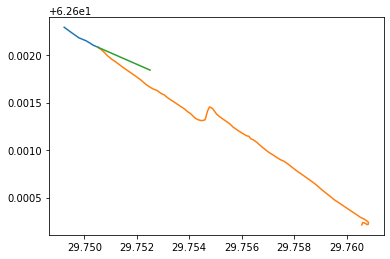

In [5]:
head_y, head_x = head_y[-10:], head_x[-10:]
plt.plot(head_y, head_x)
plt.plot(tail_y, tail_x)
plt.plot(pred_y, pred_x)
plt.show()

In [6]:
errors = error.calculate_error_vector(tail, prediction)
print(errors[:, 4])

[ 0.         14.17451439 48.96766287 84.73456597]


In [17]:
SECONDS = 3
data = dataset.load_users_trajectories(898)
split_data = split.split_trajectories_with_overlap(data, 0.75)

predictions = list(map(
    lambda row: (row[1], bullet.bullet_prediction(row[0][-2], row[0][-1], SECONDS)),
    split_data
))
errors = list(map(
    lambda row: error.calculate_error_vector(row[1], row[0])[:, 4],
    predictions
))
errors_sum = list(map(sum, errors))

print(
    'ERROR STATISTICS',
    '\naverage\t\t\t', np.average(errors_sum),
    '\nmedian\t\t\t', np.median(errors_sum),
    '\nstandard deviation\t', np.std(errors_sum)
)

ERROR STATISTICS 
average			 87.578156048683 
median			 56.45765119320747 
standard deviation	 123.72355207172127
